Pymaceuticals Inc.

Analys
:

Compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Task:
Prepare a top-level summary of the study results. Create all of the tables and figures needed for the technical report of the clinical study. In addition, provide a top-level summary of the study result.s

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
MetaData_File_df = pd.merge(mouse_metadata, study_results,  on=["Mouse ID"]) 

# Display the data table for preview
MetaData_File_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#checking the number of mice.
total_mice = MetaData_File_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Dupilcated_Mouse_ID = MetaData_File_df.loc[MetaData_File_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
Dupilcated_Mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
Dupilcated_Mouse_ID_Data_df = MetaData_File_df.loc[MetaData_File_df["Mouse ID"] == "g989", :]
Dupilcated_Mouse_ID_Data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = MetaData_File_df.loc[MetaData_File_df["Mouse ID"] !="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice in the clean DataFrame.
new_total_mice = clean_df["Mouse ID"].nunique()
new_total_mice


248

## Summary Statistics

In [7]:
# Created a data frame of summary statistics 
Summary_STATS_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].unique()


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary DataFrame.

Mean_Stat_table_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_Stat_table_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Variance_Stat_table_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
STD_Stat_table_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_Stat_table_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Summary_STAT_Table_df = pd.DataFrame({"Tumor Vol Mean":Mean_Stat_table_df, "Tumor Vol Median":Median_Stat_table_df, "Tumor Vol Var":Variance_Stat_table_df,
                                   "Tumor Vol STD":STD_Stat_table_df, "Tumor Vol SEM":SEM_Stat_table_df})


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
Aggregate_Summary_df = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
Aggregate_Summary_df 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

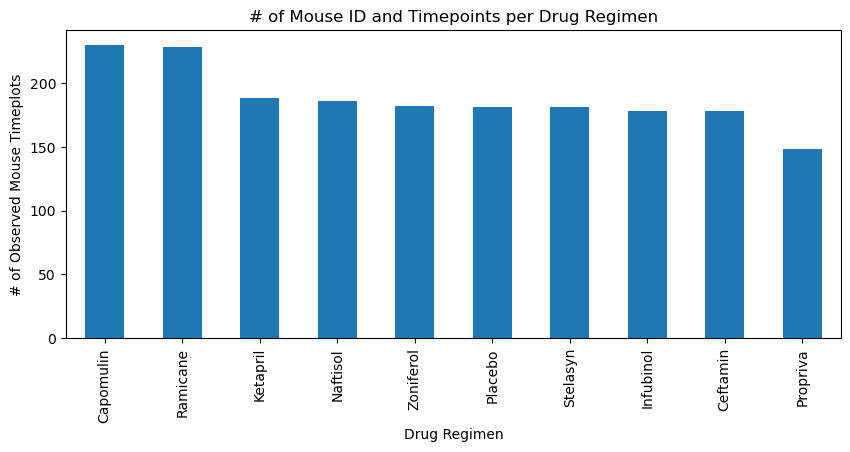

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_metadata = clean_df["Drug Regimen"].value_counts()

Panda_Bar_Plot = grouped_metadata.plot(kind="bar", figsize= (10,4))
plt.title("# of Mouse ID and Timepoints per Drug Regimen")
plt.ylabel("# of Observed Mouse Timeplots")
plt.show

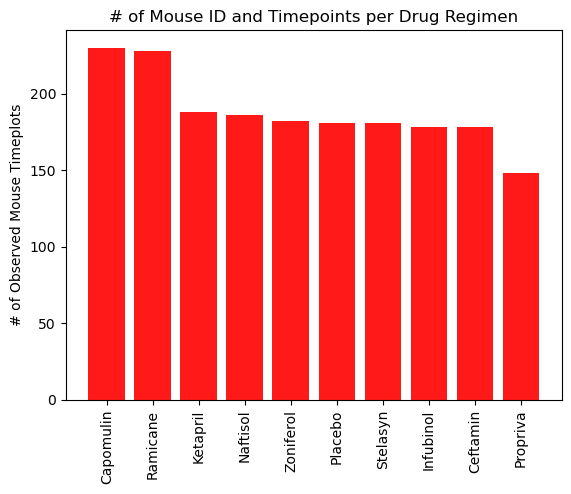

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = grouped_metadata.index.values
y_axis = grouped_metadata.values

plt.bar(x_axis, y_axis, color="r", alpha=0.9)
plt.title("# of Mouse ID and Timepoints per Drug Regimen")
plt.ylabel("# of Observed Mouse Timeplots")
plt.xticks(rotation="vertical")

plt.show()

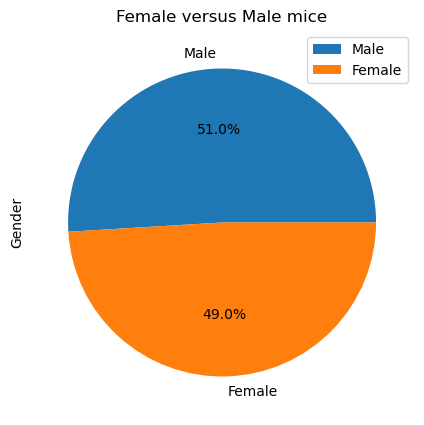

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
autopct="%1.1f%%",
Gender_ID =  clean_df["Sex"].value_counts()

# Make the pie chart
Pandas_df = pd.DataFrame({"Gender": [958, 922]},index=["Male", "Female"]) 
plot = Pandas_df.plot.pie(y="Gender", autopct="%1.1f%%", figsize=(5, 5), title=("Female versus Male mice")) 

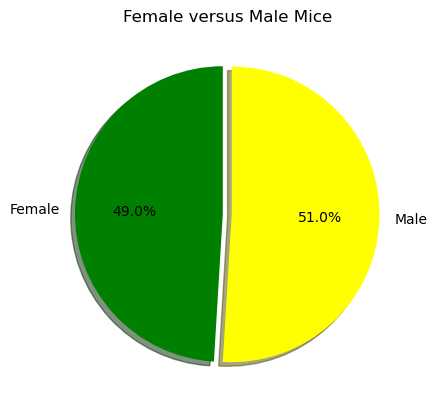

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Make the pie chart

labels =["Female", "Male"] 
sizes = [922, 958] 
colors = ["green", "yellow"] 
explode = (0.03, 0.03)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90) 
plt.title("Female versus Male Mice") 
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
GreatestTimepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
MaximumTimepoint = GreatestTimepoint.rename(columns={'Timepoint': 'Max Timepoint'})
      
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_Volume_df = pd.merge(clean_df, MaximumTimepoint, on='Mouse ID')

In [15]:
#Created a conditon that removes ("Stelasyn", "Zoniferol", "Ketapril", "Naftisol", "Propriva") from clean_df

condition = Tumor_Volume_df["Drug Regimen"].isin(["Stelasyn", "Zoniferol", "Ketapril", "Naftisol", "Propriva"])
Tumor_Volume_df_filtered = Tumor_Volume_df[~condition]

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatments_tumor_Vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset
    
for x, drug in enumerate(treatments_list):
    drug_data =Tumor_Volume_df_filtered.loc[Tumor_Volume_df_filtered  ['Drug Regimen'] == drug] 
    final_tumor_vol = drug_data.loc[drug_data['Timepoint'] == drug_data['Max Timepoint']]['Tumor Volume (mm3)']

    # add subset
    treatments_tumor_Vol_list.append(final_tumor_vol)
    
    quartiles = treatments_tumor_Vol_list[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
    print(f"For {drug}:")
    print(f"The median is {quartiles[0.5]}.")
    print(f"The lowerq is {lowerq} and the upperq is { upperq}") 
    print(f"Values below the lower bound of {lower_bound} and the upper bound of {upper_bound} are potential outliers.")
    print(f"The IQR is {iqr}.")
    print(f"______________________________________________________________________________________________________________________________________")

For Capomulin:
The median is 38.1251644.
The lowerq is 32.37735684 and the upperq is 40.1592203
Values below the lower bound of 20.70456164999999 and the upper bound of 51.83201549 are potential outliers.
The IQR is 7.781863460000004.
______________________________________________________________________________________________________________________________________
For Ramicane:
The median is 36.56165229.
The lowerq is 31.56046955 and the upperq is 40.65900627
Values below the lower bound of 17.912664470000003 and the upper bound of 54.30681135 are potential outliers.
The IQR is 9.098536719999998.
______________________________________________________________________________________________________________________________________
For Infubinol:
The median is 60.16518046.
The lowerq is 54.04860769 and the upperq is 65.52574285
Values below the lower bound of 36.83290494999999 and the upper bound of 82.74144559000001 are potential outliers.
The IQR is 11.477135160000003.
______________

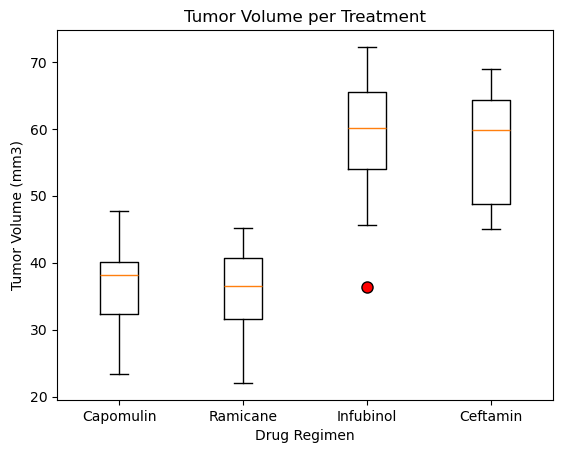

In [17]:
#Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume per Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel( "Drug Regimen")
ax1.boxplot( treatments_tumor_Vol_list, labels=treatments_list, showfliers=True, widths=0.3, vert=True, flierprops=dict(marker='o', 
           markerfacecolor='red', markersize=8))
    
plt.show()

## Correlation and Regression

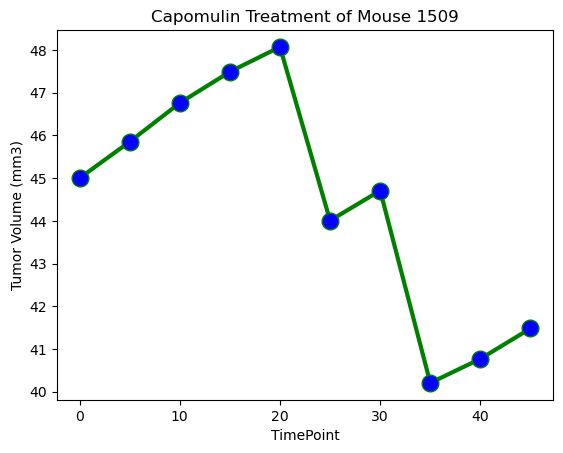

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Started by creating a DataFrame for Capomulin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
lineplot_df
x_axis = lineplot_df["Timepoint"]
tumorvol = lineplot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumorvol, linewidth=3, marker="o", markerfacecolor='blue', markersize=12, color="green")
plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


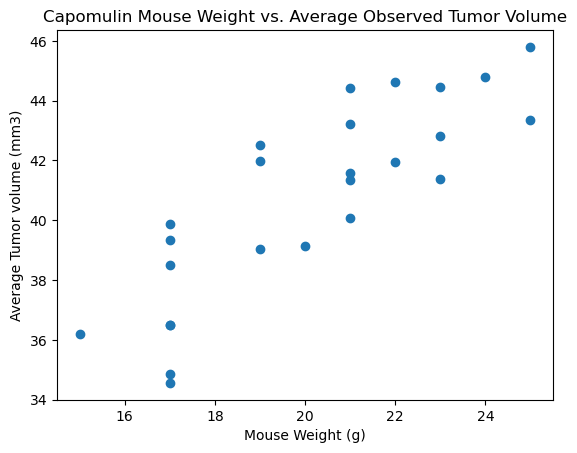

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Started by creating a DataFrame for Capomulin regimen

capomulin_regimen_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"] 

capomulin_avg_tumor_vol = capomulin_regimen_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

capomulin_plot_data = pd.merge(capomulin_avg_tumor_vol, mouse_metadata, on="Mouse ID")

plt.scatter(capomulin_plot_data["Weight (g)"], capomulin_plot_data["Tumor Volume (mm3)"])
plt.title("Capomulin Mouse Weight vs. Average Observed Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")

plt.show()

The correlation between mouse weight and the average tumor volume of 0.84
indicates a strong positive relationship.


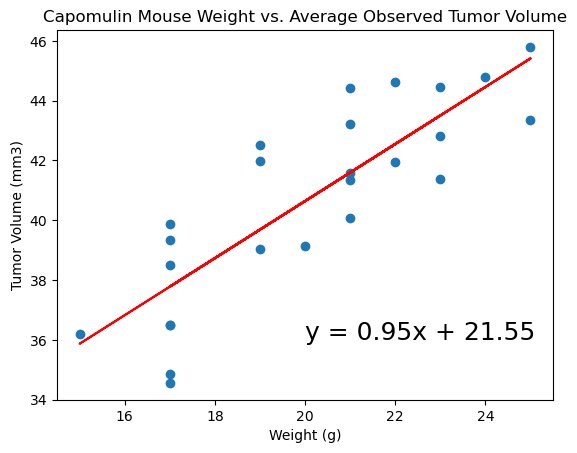

In [20]:
# Calculate a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

x_values = capomulin_plot_data["Weight (g)"]
y_values = capomulin_plot_data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=18,color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mouse Weight vs. Average Observed Tumor Volume")

# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume of {round(st.pearsonr(capomulin_plot_data["Weight (g)"], 
      capomulin_plot_data["Tumor Volume (mm3)"])[0],2)}")
print(f"indicates a strong positive relationship.")

plt.show()